# Introduction

Patricia Schuster  
Dec '19  

In [20]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>


<div id="toc"></div>

# Goals, assignments, schedule

* Week 1  
    * Intro to competitions and recap of machine learning basics  
    * Feature preprocessing and extraction  
    * Start working on final project competition  
* Week 2  
    * EDA- exporatory data analysis, using logic and visualizations  
    * Validation, train/test  
    * Data leaks  
* Week 3  
    * Improvement of solution  
    * Metrics  
    * Mean-encodings  
    * Categorical features, overfitting  
* Week 4  
    * Other advanced features  
    * Statistics and distance-based features  
    * Hyperparameter optimization  
    * Ensembles  
* Week 5  
    * Analyze the final project and winning solutions  
    
Assignments

* Competition  
    * Week 2: Basic pipeline  
    * Week 3: Improve model  
    * Week 4: Improve model  
    * Week 5: Finalize  
* Quizzes  
* Programming assignments  

# Competition mechanics

Components:

* Data  
    * Many different formats  
    * Usually a description is provided  
* Model  
    * We will produce it  
    * Transforms the data into an answer  
* Submission  
    * Compare our model vs. other participants'  
    * Competition will provide a sample submission  
* Evaluation  
    * Calculates a score vs. correct answers  
    * Accuracy, Logistic loss, AUC, RMSE, MAE  
* Leaderboard  
    * Shows performance of all participating teams  
    * Can usually select two submissions  
    
Motivation:

* Learning and networking    
* Non-trivial tasks, state-of-the-art approaches    
* Get famous  
* Could earn money  

# Kaggle overview

Kernels:

* If you want to check an idea quickly or share code with other participants or teammates  
* Like a small virtual machine in which you write, execute, and share your code  
* Others can view your file and comment it  
* Submit through a specialized form  

# Real life vs. competitions

* Competitions usually have formulated the problem and done data cleaning  
* You just need to do pre-processing, select model  
* Business insight helpful but not necessary  
* Competitions not just about the ML algorithm if you want to win  

Do not limit yourself!

* It's ok to use:  
    * Heuristics  
    * Manual data analysis  
* Don't be afraid of
    * Complex solutions  
    * Advanced feature engineering  
    * Doing huge calculations  
* Be creative!


# Recap of main ML algorithms

* Linear  
* Tree-based  
* kNN  
* Neural networks  

**No Free Lunch Theorem:** There's no method that outperforms all others for all tasks. Every method has a weakness. We must have a variety of methods to choose from. 


## Linear

* Can be generalized for high-dimensional space  
* Tries to separate data with a line into two subspaces with a hyperplane  
* Examples: Linear models with different loss functions  
    * Logistic regression  
    * SVM Support Vector Machines  
* Good for sparse, high-dimensional data  

## Tree-based methods

* Use decision tree as a building block for building more complicated models   
* Can reduce the number of lines, describe lines in simple way  
* Splits space into boxes  
* Uses divide and conquer approach to split spaces up into sub-spaces  
* Several approaches for performing the splits, leading to a wide variety of tree-based methods  
    * Random forest  
    * Gradient boosted decision trees **Powerful**  
* Very powerful, a good default method for tabular data  
* Hard to capture linear dependencies because it requires a lot of splits  
    * Splits must be horizontal or vertical in 2D space
    * Vs. a linear model where you can make a sloped line  
* Extra Trees classified, a.k.a. Extremely Randomized Trees. Introduce more variation into the ensemble, features and splits selected at random, less computationally expensive than random forest
    
[Resource: Random forests explained intuitively](https://www.datasciencecentral.com/profiles/blogs/random-forests-explained-intuitively)  
[Resource: Gradient boosting explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)  

**Gradient Boosting Method**: Follow the resource above.  
* Builds an ensemble of trees one-by-one, then the predictions of the individual trees are summed: $D(x) = d_{tree1}(x) + d_{tree2}(x) + ...$  
* Train a tree to reconstruct the difference between the target function and the current predictions of an ensemble, which is called the residual: $R(x) = f(x) - D(x)$
* Iterative process of ensemble building  


    
## k-NN: k-Nearest Neighbors

* Assume that points near each other are likely to have similar labels. For an unknown point, what are its nearest neighbors?  
* Use square distance to find nearest case, very simple  
* Despite simplicity, often very informative  
* In scikit-learn you can define your own distance function  

[Resource: Introduction to k-NN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)  

## Neural networks

* Save this for another time  
* Basically treat it as a black box  
* Some are especially good for images, sound, text  
* TensorFlow, PyTorch are useful  
* Feed-forward NNs produce smooth non-linear decision boundaries


# Feature preprocesing and generation with respect to models

* Feature preprocessing  
* Feature generation  
* Their dependence on a model type

## Take a look at the Titanic dataset

Each row: a person  
Each column: a feature  

Columns:

* `Survived`: 0 or 1, binary (and the target)
* `Age`, `fare`: Numeric
* `SibSp`, `Parch`, `Pclass`: Categorical
* `Ticket`, `PassengerID`: ID, unique to each individual
* `Name`: Text

## Feature preprocessing

Each type of feature has its own way of being preprocessed in order to prepare it for classifier. 

For example: `pclass` column is nonlinear. If you want to use a linear model, you can split the `pclass` into three columns: `pclass==1`, `pclass=2`, `pclass=3`, and each will be a binary column. This is not useful for random forest, because random forest can easily work with a nonlinear column.

## Numeric features
    
**Scaling**

* Different scaling results in different model quality  
* Rescale features to the same scale, 0 to 1. Use `sklearn`'s **`MixMaxScalar`**. `X = (X-X.min())/(X.max()-X.min())`. Try this out on the titanic dataset. I'm going to copy the titanic data here from our titanic project repo.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import seaborn as sns
sns.set(style='ticks')
import os
import sys

In [6]:
data_dir = r'readonly/titanic_data/'
train_df = pd.read_csv(os.path.join(data_dir,'train.csv'))
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


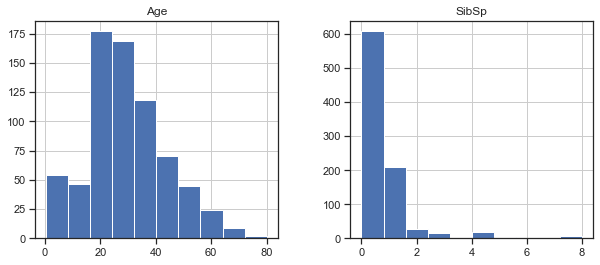

In [12]:
train_df[['Age','SibSp']].hist(figsize=(10,4));

C:\Users\pfsch\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


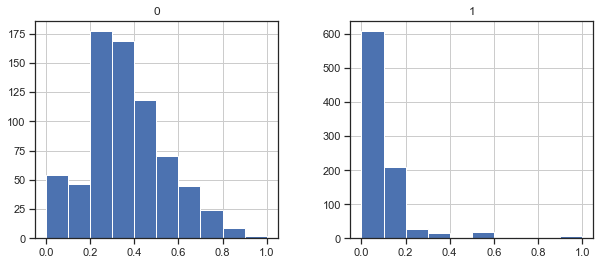

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(train_df[['Age','SibSp']]);
pd.DataFrame(xtrain).hist(figsize=(10,4));

Another option is **`StandardScaler`**, which scales the data like the z-value in stats: `X = (X-X.mean())/X.std()`

C:\Users\pfsch\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pfsch\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


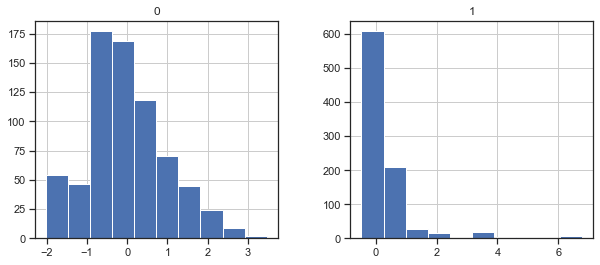

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(train_df[['Age','SibSp']]);
pd.DataFrame(xtrain).hist(figsize=(10,4));

Both scaling methods perform about the same for tree-based methods. You can tweak the scaling to boost various features in kNN. 

**Outliers**

To protect models from outliers, clip data. Calculate lower and upper bounds as 1st and 99th percentile. 

Winsorization removes outliers by clipping feature's values.

**Rank transformation**

Sets spaces between proper assorted values to be equal. Can be better than `MinMaxScaler` if there are outliers, because it will move the outliers closer to the other day. Linear models, kNN, and neural networks can benefit from this transformation if you don't have time to handle outliers manually. 

**Log, sqrt transformation**

Helps non-tree based methods and especially neural networks. Move values closer to the mean value. Helps moves outliers closer to other values.


## Feature generation

A way to create new features using knowledge about the features and the task. It helps us by making model training simple and effective. 

Use prior knowledge and EDA to proceed.

Example: If you know real estate price and square footage, calculate price per square foot.

Example: If you're trying to understand how customers perceive prices, you may transform the price to the fractional price. $2.49\rightarrow0.49$. 

# Categorical and ordinal features

Look at columns `Sex`, `Cabin`, `Pclass`, and `Embarked`.

Ordinal = ordered categorial feature. For example, `Pclass` is an ordinal feature. Why? If it had been numerical, then we would consider the difference between 1st and 2nd class to be equal to the difference between 2nd and 3rd class. But if it's ordinal, we don't know which difference is bigger. 

The simplest way to encode a categorical feature is to map its values to different features. This is usually referred to as label encoding. 

`Embarked` can be encoded in a few ways.  
* Alphabetical: `[S,C,Q] > [2,1,3]`.  
* Order of appearance: `[S,C,Q] > [1,2,3]`.  
* Frequency encoding: `[S,C,Q] > [0.5,0.3,0.2]`. This preserves some information about a feature's distribution, and can be useful for linear and tree-based methods. However, if you have multiple categories with the same frequency, they will be indistinguishable. 

For a linear model, you need to do One-hot encoding, where you make one column for each possible value of a categorical feature. Example, split the `pclass` into three columns: `pclass==1`, `pclass=2`, `pclass=3`. 

**Feature generation**: Look at interaction between features. For example, concatenate two columns, and then one-hot encode. `pclass` + `sex` $\rightarrow$ `pclass_sex`. Columns are `1male`, `1female`, `2male`, etc. 

# Datetime and coordinates

Datetime:  

* Periodicity: Day number in week, month, season, year, etc.
* Time passed since a moment: Row-dependent or row-independent
* Difference between dates

Coordinates:  

* Geographical  
* Add features like buildings, and calculate distance between points
* You can rotate coordinates to help point straight lines in a diagonal direction
* Centers of clusters, aggregated statistics

# Handling missing values

Fillna approaches:

* `NaN`s, 999, -1  
* sample mean or medium- this can mess up your analysis  
* reconstruct value  

How to fill missing values:

* Interpolate between points  
* Ignore missing values while calculating metrics for each feature  
* Replace with a value outside the feature range, such as -999
* Avoid filling `NaN`s before feature generation
* A lot of models can handle `NaN`

# Feature extraction from texts and images

## Texts

Example from Titanic: Using the name feature. How can we extract useful information from it?

In [19]:
train_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

**Texts preprocessing:**

* Lemmatization- shorten words to their root. Democracy, democratic, democratization $\rightarrow$ democr  
* Stemming- standardize ending. Democracy, democratic, democratization $\rightarrow$ democracy  
* Stopwords- not helpful to solving the task, like articles or prepositions, very common words. `sklearn` has a feature to ignore those words  

**1. Apply bag of words**   

* Create a column for each word in the text, column entry is the number of times that word was used per row.    
* Term frequency transformation- normalize per row. Sum of all columns across a row is 1.  
* Boost more important features by normalizing features column-wise  
* N-grams, divide text into individual words and also into short phrases. Can also do character N-grams. Captures some word interaction.  
* May need to consider upper, lower case, for example.  


**2. Extract to vector**  

`Word2vec` converts each word to a vector in a sophisticated space, often with hundreds of dimensions. Challenging to derive vectors for sentences, requires a special model like `Doc2vec`.  

Training can take a long time. Use models that have been trained already, like one that has been trained on Wikipedia.

**In a competition**

* BOW  
    * Very large vectors  
    * Meaning of each value in vector is known  
* `Word2vec`  
    * Relatively small vectors  
    * Values in vector can be interpreted only in some cases, sometimes a downside  
    * The words with similar meaning often have similar vector representations  
    
Can usually use the two together in your solution. 

## Images

Convert it to a vector.  
1. Descriptors  
2. Train network from scratch  
3. Finetuning  
    * example: Classify roof images to east-west, nort-south, flat, or other. Idea- rotate the images and then classify them to quadruple the size of the dataset.  
    * Details found in `keras` library  
    * Especially useful if you don't have any other data than the images  
        
Benefit from using a model that has been trained on a similar dataset.

# Final project overview

Time-series data provided by 1C. Task: forecast the sales for every item in every shop in the testing period. 30 shops, 20000 unique items. 